## Tabalho Pratico 4

### Imports

In [494]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Carregando Imagens

In [495]:
img_bolhas = cv2.imread('bolhas.png')[:,:,::-1]
img_bolhas_gray =  cv2.cvtColor(img_bolhas, cv2.COLOR_RGB2GRAY)

img_coins = cv2.imread('coins-01.jpg')[:,:,::-1]
img_coins_gray =  cv2.cvtColor(img_coins, cv2.COLOR_RGB2GRAY)

img_shapes = cv2.imread('shapes.png')[:,:,::-1]
img_shapes_gray =  cv2.cvtColor(img_shapes, cv2.COLOR_RGB2GRAY)

### Redução de ruido


Removemos o ruido atraves do filtro gaussiano. Não fizemos o mesmo para a img_bolhas e img_shapes pois ambas não possuem ruido.

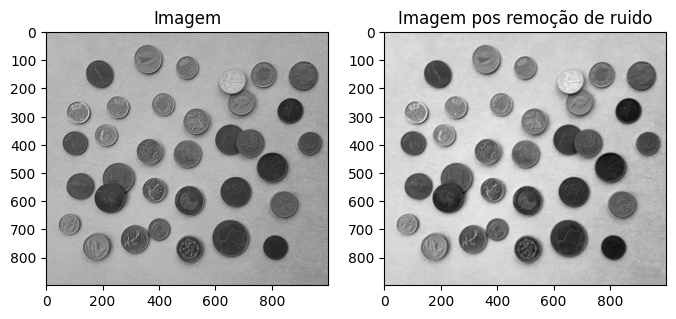

In [496]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)
fig.add_subplot(1,2,1)
plt.title("Imagem")
plt.imshow(img_coins_gray, cmap='gray')

img_coins_gblur = cv2.GaussianBlur(img_coins_gray, [7, 7], 0)

fig.add_subplot(1,2,2)
plt.title("Imagem pos remoção de ruido")
plt.imshow(img_coins_gblur, cmap='gray')


## Remoção de fundo


### Imagem "bolhas.png"

Utilizamos o algoritmo floodfill para preencher os buracos

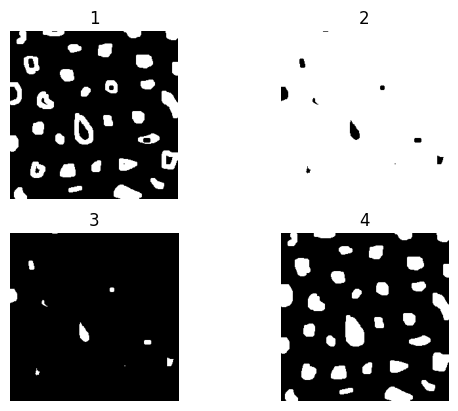

In [497]:
img_floodfill = img_bolhas_gray.copy()
height, width = img_floodfill.shape[:2]
mask = np.zeros((height+2, width+2), np.uint8)
    
cv2.floodFill(img_floodfill, mask, (0, 0), 255)
    
inverse_floodFill = cv2.bitwise_not(img_floodfill)
foreground_img_bolhas = cv2.bitwise_or(img_bolhas_gray, inverse_floodFill)

plt.subplot(2, 2, 1), plt.title('1'), plt.axis('OFF'), plt.imshow(img_bolhas_gray, cmap='gray')
plt.subplot(2, 2, 2), plt.title('2'), plt.axis('OFF'), plt.imshow(img_floodfill, cmap='gray')
plt.subplot(2, 2, 3), plt.title('3'), plt.axis('OFF'), plt.imshow(inverse_floodFill, cmap='gray')
plt.subplot(2, 2, 4), plt.title('4'), plt.axis('OFF'), plt.imshow(foreground_img_bolhas, cmap='gray')

plt.show()

### Imagem "coins-01.jpg"



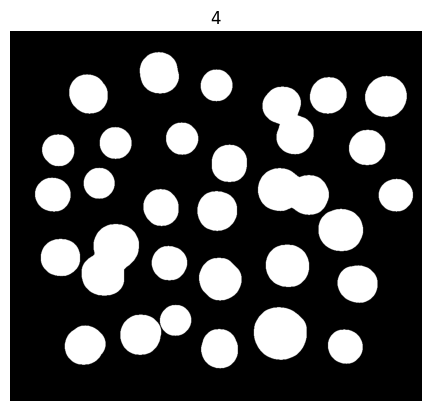

In [498]:
canny_img = cv2.Canny(img_coins_gblur, 100, 0)
        
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, [7, 7])
canny_img = cv2.morphologyEx(canny_img, cv2.MORPH_CLOSE, kernel, iterations=2)
        
img_coins_gblur = canny_img.copy()

img_floodfill = img_coins_gblur.copy()
height, width = img_floodfill.shape[:2]
mask = np.zeros((height+2, width+2), np.uint8)
    
cv2.floodFill(img_floodfill, mask, (0, 0), 255)
    
inverse_floodFill = cv2.bitwise_not(img_floodfill)  

foreground_img_coins = cv2.bitwise_or(img_coins_gblur, inverse_floodFill)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, [75, 75])
foreground_img_coins = cv2.morphologyEx(foreground_img_coins, cv2.MORPH_OPEN, kernel, iterations=1)
        
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, [3, 3])
foreground_img_coins = cv2.erode(foreground_img_coins, kernel2, iterations=2)
foreground_img_coins = cv2.morphologyEx(foreground_img_coins, cv2.MORPH_OPEN, kernel)


plt.subplot(1, 1, 1), plt.title('4'), plt.axis('OFF'), plt.imshow(foreground_img_coins, cmap='gray')

plt.show()

In [499]:

def erosion(imagem,x,y,height,width):
    if (imagem[x][y] == 255):
        if (x > 1 and y > 1 and y < height and x < width):
            if (imagem[x - 1][y] != 255 or imagem[x+1][y] != 255 or imagem[x][y + 1] != 255 or imagem[x][ y - 1] != 255):
                return True
            if(imagem[x-1][y-1] != 255 or imagem[x+1][y-1] !=255 or imagem[x-1][y+1] != 255 or imagem[x+1][y+1] != 255):
                return True
            return False
        
def percorrer_tudo_diminuindo_objetos(imagem):
    img_width, img_height = imagem.shape[:2]
    visitados = np.zeros((img_width, img_height))
    remover = np.zeros ((img_width, img_height))

    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            if (imagem[i][j] == 255 and visitados[i][j] == 0):
                percorrer2(i, j, remover, visitados, imagem, img_height, img_width)
            visitados[i][j] = 1

    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            if(remover[i][j] == 1):
                imagem[i][j] = 0

    return imagem


def percorrer2(x, y, remover, visitados, imagem, img_height, img_width):
    # percorre pela esquerda
    if (x > 0):
        if (visitados[x - 1][y] != 1):
            visitados[x - 1][y] = 1
            
            if(erosion(imagem,x-1,y,img_height,img_width)):
                remover[x-1][y] = 1

            percorrer2(x - 1, y, remover, visitados, imagem, img_height, img_width)
    # percorre pela direita
    if (x + 1 < img_width):
        if (visitados[x + 1][y] != 1):
            visitados[x + 1][y] = 1
            if (erosion(imagem, x + 1, y, img_height, img_width)):
                remover[x + 1 ][y] = 1

                percorrer2(x + 1, y, remover, visitados, imagem, img_height, img_width)

        # percorre por cima
    if (y > 0):
        if (visitados[x][y - 1] != 1):
            visitados[x][y - 1] = 1
            if (erosion(imagem, x, y-1, img_height, img_width)):
                remover[x][y-1] = 1

                percorrer2(x, y - 1, remover, visitados, imagem, img_height, img_width)

        # percorre por baixo
    if (y + 1 < img_height):
        if (visitados[x][y + 1] != 1):
            visitados[x][y + 1] = 1
            if(erosion(imagem, x, y+1, img_height, img_width)):
                remover[x][y + 1] = 1

                percorrer2(x, y + 1, remover, visitados, imagem, img_height, img_width)

7009


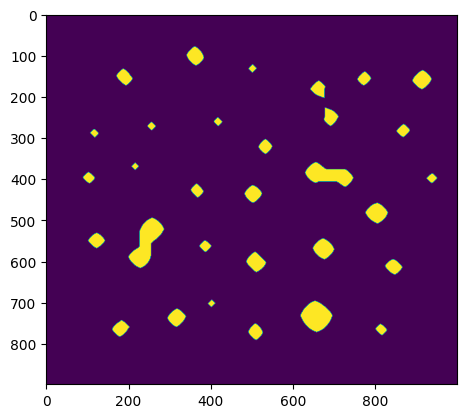

In [502]:
i = 0
while(i <22):
    foreground_img_coins = percorrer_tudo_diminuindo_objetos(foreground_img_coins)
    i +=1

plt.imshow(foreground_img_coins)


### Imagem shapes.png

O objetivo aqui foi remover as bordas envolta dos elementos da imagem que tinham pixels diferentes da cor branca que compoões o restante dos elementos da imagem

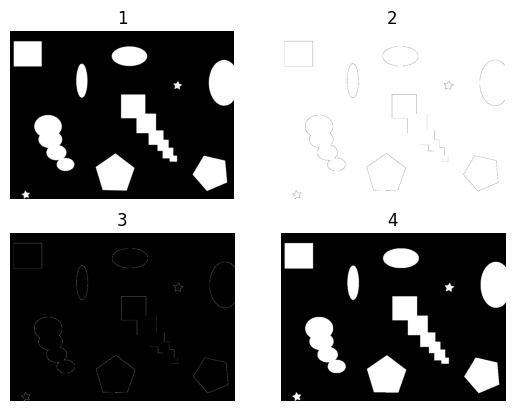

In [503]:
img_floodfill = img_shapes_gray.copy()
height, width = img_floodfill.shape[:2]
mask = np.zeros((height+2, width+2), np.uint8)
    
cv2.floodFill(img_floodfill, mask, (0, 0), 255)
    
inverse_floodFill = cv2.bitwise_not(img_floodfill)
foreground_img_shapes = cv2.bitwise_or(img_shapes_gray, inverse_floodFill)

plt.subplot(2, 2, 1), plt.title('1'), plt.axis('OFF'), plt.imshow(img_shapes_gray, cmap='gray')
plt.subplot(2, 2, 2), plt.title('2'), plt.axis('OFF'), plt.imshow(img_floodfill, cmap='gray')
plt.subplot(2, 2, 3), plt.title('3'), plt.axis('OFF'), plt.imshow(inverse_floodFill, cmap='gray')
plt.subplot(2, 2, 4), plt.title('4'), plt.axis('OFF'), plt.imshow(foreground_img_shapes, cmap='gray')

plt.show()

## Algoritmo de segmentação

Fazemos aqui um algoritmo que identifica o começo de um novo "objeto" na imagem através de sua cor(branca, 255) e se ele já foi marcado como visitado na array de visitados ou não. 

Caso não tenha sido visitado e é de cor branca, receberá uma tonalidade incrementada em relação à anterior e percorrerá por todos seu vizinhos(cima,baixo,direita,esquerda). Verificando se eles também fazem parte do mesmo "objeto" através da verificação da cor branca e atribuindo uma tonalidade nova aos mesmos

In [504]:
sys.setrecursionlimit(1000000)


def percorrer_tudo(imagem):
    img_width,img_height  = imagem.shape[:2]
    tonalidade = 0
    visitados = np.zeros((img_width,img_height))

    total_de_objetos = 0

    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            if(imagem[i][j] == 255 and visitados[i][j] == 0):
                

                total_de_objetos+=1 #a cada novo objeto incrementa a quantidade

                tonalidade += 1 #para atribuir diferentes tonalidades aos objetos
                imagem[i][j] = tonalidade
                percorrer(i, j, tonalidade,visitados, imagem,img_height,img_width)
            visitados[i][j] = 1
    return imagem

def percorrer(x,y, tonalidade,visitados, imagem, img_height, img_width):
    #percorre pela esquerda
    if(x>0):
        if(visitados[x-1][y] != 1):
            visitados[x-1][y] = 1
            if(imagem[x-1][y] == 255):
                imagem[x-1][y] = tonalidade
                percorrer(x-1,y,tonalidade,visitados,imagem,img_height,img_width)
    #percorre pela direita
    if(x+1<img_width):
        if (visitados[x + 1][y] != 1):
            visitados[x + 1][y] = 1
            if (imagem[x + 1][y] == 255):
                imagem[x + 1][y] = tonalidade
                percorrer(x + 1, y,tonalidade,visitados, imagem,img_height,img_width)
    
        #percorre por cima
    if(y>0):
        if (visitados[x][y-1] != 1):
            visitados[x][y-1] = 1
            if (imagem[x][y-1] == 255):
                imagem[x][y-1] = tonalidade
                percorrer(x , y-1,tonalidade,visitados, imagem,img_height,img_width)


        #percorre por baixo
    if(y+1<img_height):
        if (visitados[x][y+1] != 1):
            visitados[x][y+1] = 1
            if (imagem[x][y+1] == 255):
                imagem[x] [y+1] = tonalidade
                percorrer(x, y+1,tonalidade,visitados, imagem,img_height,img_width)


In [505]:
img_bolhas_seg = percorrer_tudo(foreground_img_bolhas)

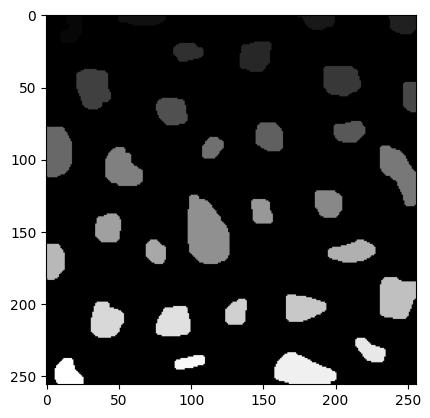

In [506]:
plt.imshow(img_bolhas_seg, cmap="gray")

In [507]:
img_coins_seg = percorrer_tudo(foreground_img_coins)

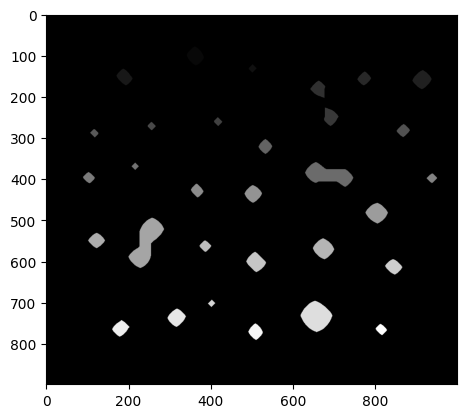

In [508]:
plt.imshow(img_coins_seg, cmap="gray")

In [509]:
img_shapes_seg = percorrer_tudo(foreground_img_shapes)

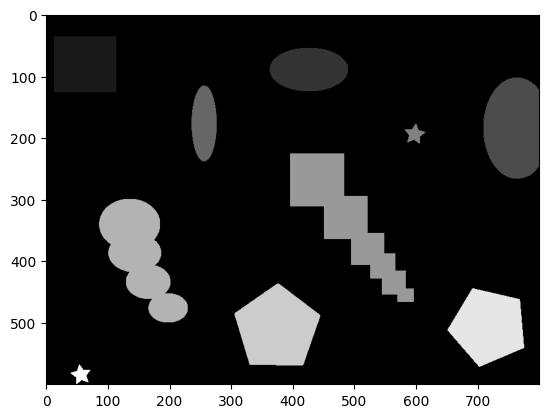

In [510]:
plt.imshow(img_shapes_seg, cmap="gray")

## Mostrando a quantidade e colorindo os objetos da imagem

Nessa função identificamos o valor maximo de objetos encontrados na imagem atraves da função, np.max(img) e tendo essa informação, utilizamos da mesma para incrementar o hue_counter num looping de repetição, responsavel por gerar uma imagem HSV que sera convertida para RGB e salva na nossa array de cores(arr_color)

Apos isso para cada objeto da imagem percorremos por toda largura e altura da mesma, buscando pelos pixels da imagem que faça parte daquele objeto, assim colorindo-o com um valor RGB conforme o indice mapeado do array arr_color

In [511]:
def generate_core_map(img):
    
    maximum_value = np.max(img)
    hue_counter = 0
    arr_color = []
    
    print("Objetos encontrados:", maximum_value)
    
    hsv2rgb_img = np.zeros((1, 1, 3), dtype=np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    for i in range(maximum_value):

        if(hue_counter < 180):
            hsv2rgb_img[::] = (hue_counter, 255, 255)
            
            arr_color.append(cv2.cvtColor(hsv2rgb_img, cv2.COLOR_HSV2RGB))
            hue_counter += int(np.floor(180 / maximum_value))
               
    rgb_img = np.zeros(img.shape, dtype=np.uint8)
    
    #percorre de 0 ate o numero rotulado do ultimo objeto
    for k in range(maximum_value):
        # altura da imagem
        for i in range(img.shape[0]):
            # largura da imagem
            for j in range(img.shape[1]):
                p = (i, j, 2)    
                if(img[p] == (k + 1)):
                    rgb_img[i, j] = arr_color[k]
                       
    return rgb_img

Objetos encontrados: 32


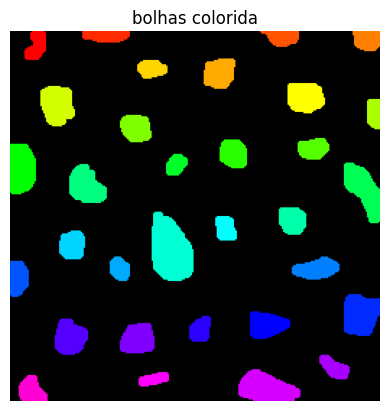

In [512]:
img_bolhas_color = generate_core_map(img_bolhas_seg)
plt.title('bolhas colorida'), plt.axis('OFF'), plt.imshow(img_bolhas_color)
plt.show()

Objetos encontrados: 31


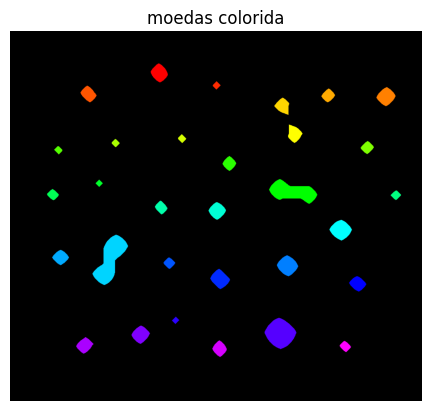

In [513]:
img_coins_color = generate_core_map(img_coins_seg)
plt.title('moedas colorida'), plt.axis('OFF'), plt.imshow(img_coins_color)
plt.show()

Objetos encontrados: 10


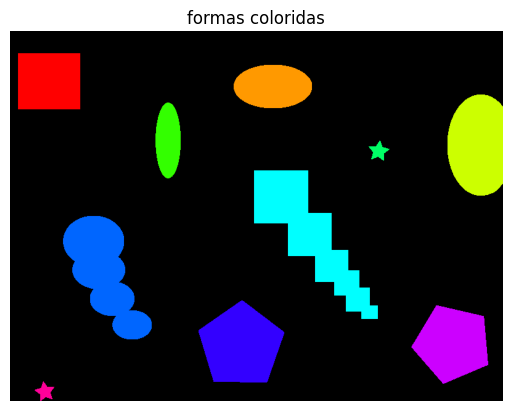

In [514]:
img_shapes_color = generate_core_map(img_shapes_seg)
plt.title('formas coloridas'), plt.axis('OFF'), plt.imshow(img_shapes_color)
plt.show()

## Histograma


In [515]:
def gerar_histograma(img):
    img_ravel = np.ravel(img)
    ir = np.where(img_ravel > 0)
    
    hist = plt.hist(img_ravel[ir], 256, [0, 256])
    
    arr_pixelsObjects = hist[0]
    ap = np.where(arr_pixelsObjects > 0)

    plt.title('Histogram'), plt.show()

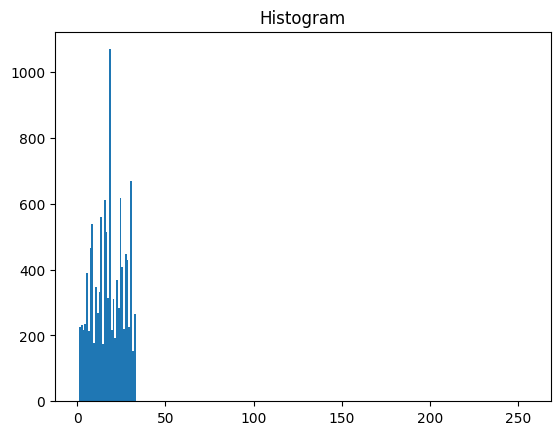

In [516]:
gerar_histograma(img_bolhas_seg)

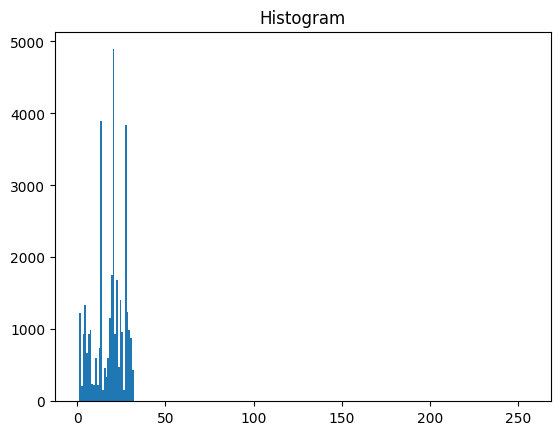

In [517]:
gerar_histograma(img_coins_seg)

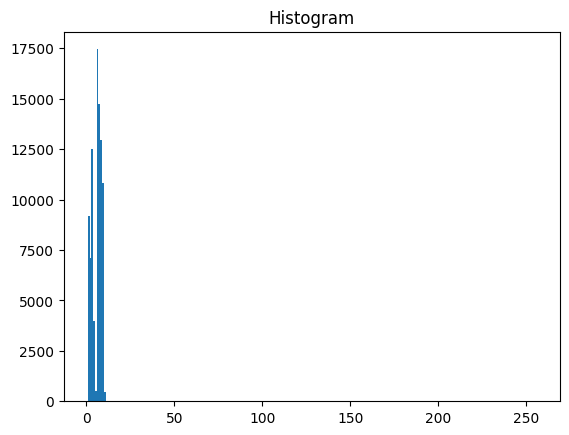

In [518]:
gerar_histograma(img_shapes_seg)